# Question 1
Learn and understand Zipf’s Law.
Pick any file (or files) in NLTK package.
Prove if Zipf’s Law works in Natural Language or not. 

In [24]:
import nltk
import glob #File IO
import string #Used for String.Puncuation
import csv
import numpy as np #for graphical representation
import matplotlib.pyplot as plt #for graphical representation

In [25]:
text_data = list();
for filename in glob.glob("C:\\Users\\ninad\\Roaming\\nltk_data\\corpora\\gutenberg\\*.txt"):
    f = open(filename,errors="Error01")
    text_data += [word.lower() for line in f for word in line.rstrip().split()]
print(text_data[:100])

['[emma', 'by', 'jane', 'austen', '1816]', 'volume', 'i', 'chapter', 'i', 'emma', 'woodhouse,', 'handsome,', 'clever,', 'and', 'rich,', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition,', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence;', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her.', 'she', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate,', 'indulgent', 'father;', 'and', 'had,', 'in', 'consequence', 'of', 'her', "sister's", 'marriage,', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period.', 'her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses;']


In [28]:
def removePuncuation(word):
    removP = str.maketrans('', '', string.punctuation)
    return word.translate(removP)

In [29]:
text_data = [removePuncuation(word) for word in text_data]
text_data = [word for word in text_data if len(word)>0]
print(len(text_data))

2134514


In [31]:
fdist = nltk.FreqDist(text_data)
flist = fdist.most_common()
print(flist[:20])

[('the', 133211), ('and', 94787), ('of', 71173), ('to', 47591), ('a', 33573), ('in', 33391), ('i', 28593), ('that', 28241), ('he', 25408), ('it', 21537), ('his', 21375), ('for', 19396), ('was', 18647), ('with', 17560), ('not', 17281), ('is', 16343), ('be', 16056), ('you', 15878), ('as', 14464), ('but', 13558)]


In [32]:
csvFile = open('WordFreq.csv', 'w')
writer = csv.writer(csvFile)
writer.writerow(['Word', 'Rank', 'Frequency']) #header
for i in range(len(flist)):
    addRank = lambda flist,i: [flist[i][0], i+1, flist[i][1]] #lambda 
    writer.writerow(addRank(flist,i))
csvFile.close()

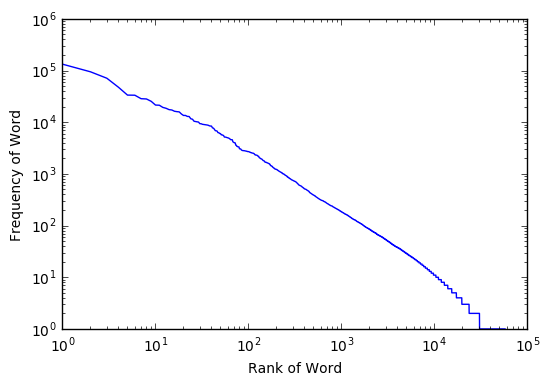

In [33]:

data = np.genfromtxt('WordFreq.csv', delimiter=',', skip_header=1, names=['Word', 'Rank', 'Frequency'])

plt.loglog(data['Rank'],data['Frequency'], basex=10, basey=10)
plt.xlabel("Rank of Word")
plt.ylabel("Frequency of Word")
plt.show()